# First part of the assignment of ANNDA lab

## 3.1.1 Generation of linearly separable data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from src.data import generate_binary_classification_data
from src.perceptron import Perceptron
from src.plotting import plot_decision_boundary, plot_learning_curve
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np
import pandas as pd
sns.set(style="white")

img_path = 'img/'

In [2]:
df = generate_binary_classification_data(classes=(1, -1))

X=df[['x1', 'x2']].to_numpy()
y_true=df[['y']].to_numpy()

negative = X[(y_true == -1).flatten()]
positive = X[(y_true == 1).flatten()]

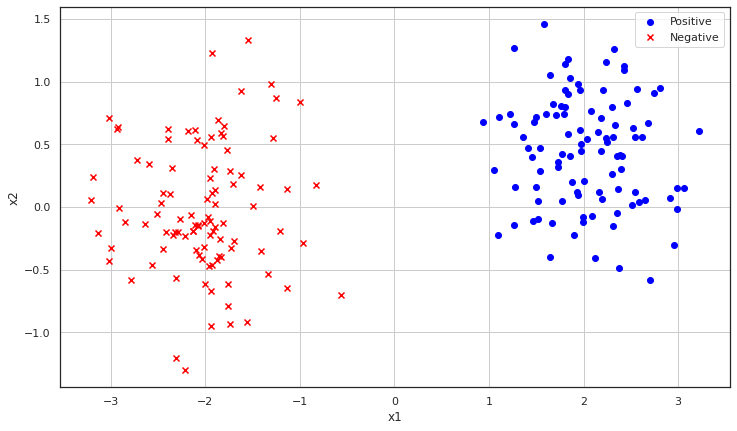

In [3]:
plot_decision_boundary(
    X=X,
    positive=positive,
    negative=negative,
    path=img_path+'dataset'
)

## 3.1.2  Classification with a single-layer perceptron and analysis

### Perceptron vs Delta batch learning rule

In [4]:
perceptron_original = Perceptron(learning_rule='perceptron', max_iterations=200)
perceptron_delta_batch = Perceptron(learning_rule='delta_batch', max_iterations=200)

In [5]:
perceptron_original.fit(X, y_true)
perceptron_delta_batch.fit(X, y_true)

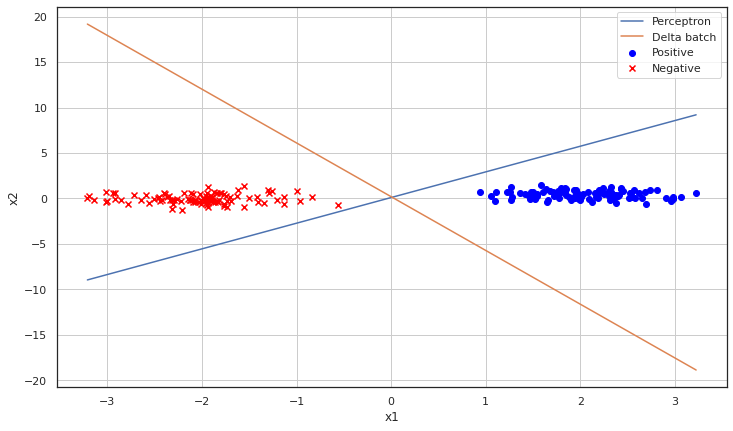

In [6]:
plot_decision_boundary(
    X=X,
    positive=positive,
    negative=negative,
    models=[perceptron_original, perceptron_delta_batch],
    names=['Perceptron', 'Delta batch'],
    path=img_path+'perceptron_vs_delta_batch'
)

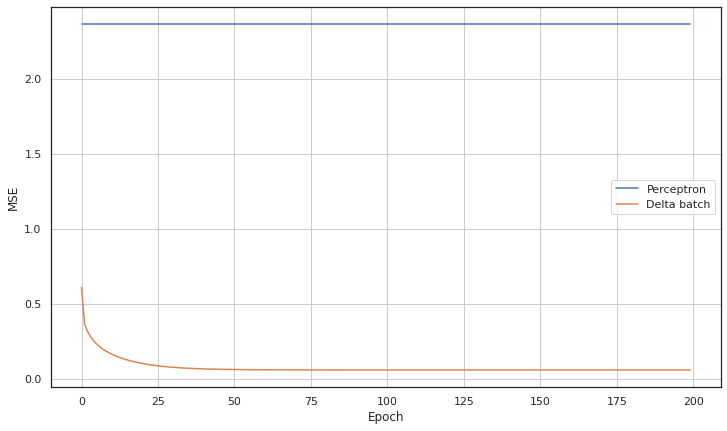

In [7]:
plot_learning_curve(
    errors=[perceptron_original.error_per_epoch['mse'], perceptron_delta_batch.error_per_epoch['mse']],
    names=['Perceptron', 'Delta batch'],
    metric='MSE',
    path=img_path+'perceptron_vs_delta_batch_mse'
)

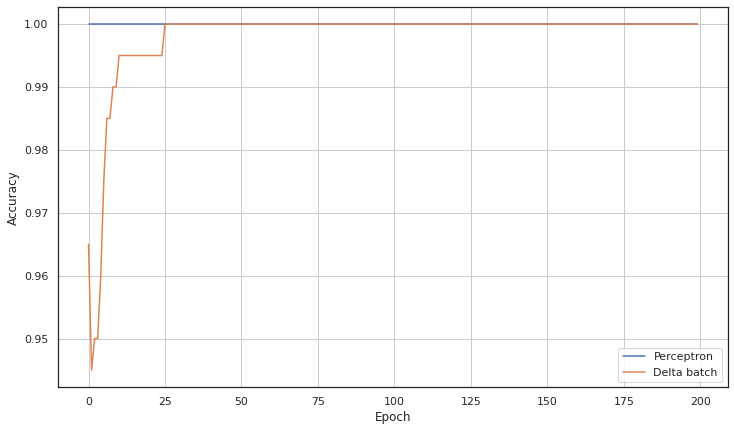

In [8]:
plot_learning_curve(
    errors=[perceptron_original.error_per_epoch['accuracy'], perceptron_delta_batch.error_per_epoch['accuracy']],
    names=['Perceptron', 'Delta batch'],
    metric='Accuracy',
    path=img_path+'perceptron_vs_delta_batch_accuracy'
)

### Delta batch vs online

#### Learning curves

In [9]:
delta_batch = Perceptron(
    learning_rule='delta_batch',
    max_iterations = 100,
)
delta_online = Perceptron(
    learning_rule='delta_online',
    max_iterations = 100,
)


delta_batch.fit(X, y_true)
delta_online.fit(X, y_true)

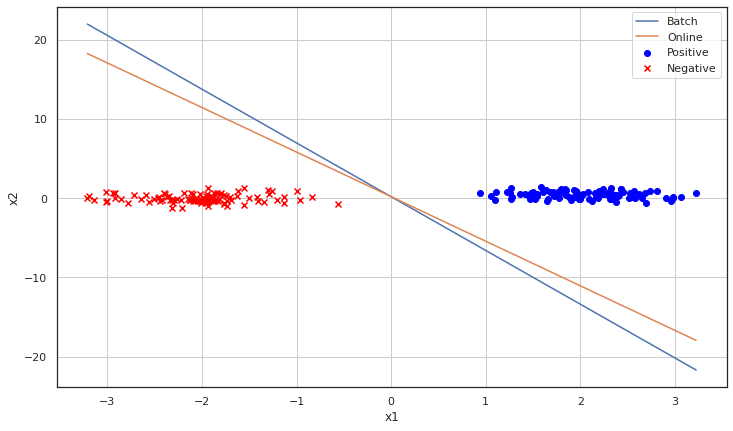

In [10]:
plot_decision_boundary(
    X=X,
    positive=positive,
    negative=negative,
    models=[delta_batch, delta_online],
    names=['Batch', 'Online'],
    path=img_path+'batch_vs_online'
)

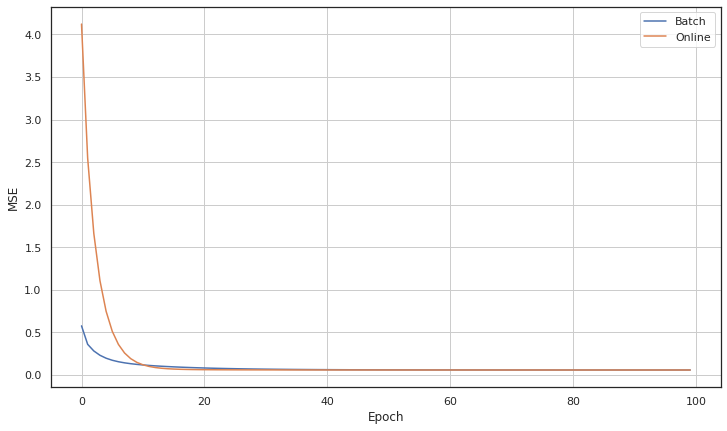

In [11]:
plot_learning_curve(
    errors=[delta_batch.error_per_epoch['mse'], delta_online.error_per_epoch['mse']],
    names=['Batch', 'Online'],
    metric='MSE',
    path=img_path+'batch_vs_online_mse'
)

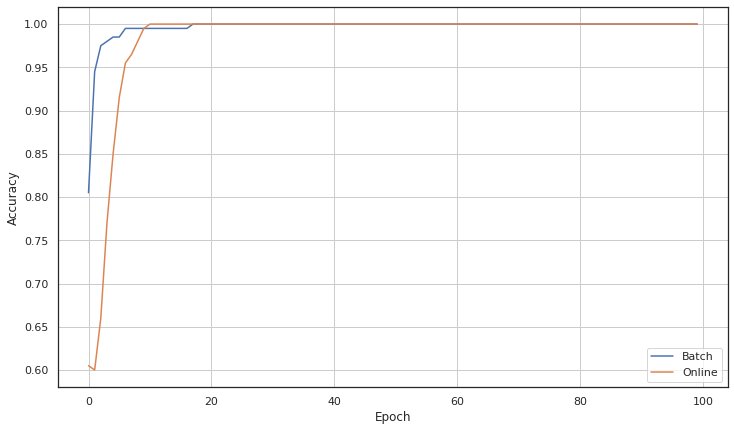

In [12]:
plot_learning_curve(
    errors=[delta_batch.error_per_epoch['accuracy'], delta_online.error_per_epoch['accuracy']],
    names=['Batch', 'Online'],
    metric='Accuracy',
    path=img_path+'batch_vs_online_accuracy'
)

#### Sensibility to random initialization

In [13]:
perceptrons = {
    'perceptron_'+ str(i) : Perceptron(
        learning_rule='delta_online',
        max_iterations=100,
        scale=5
    ) for i in range(5)
}

In [14]:
for perceptron in perceptrons.values():
    perceptron.fit(X, y_true)

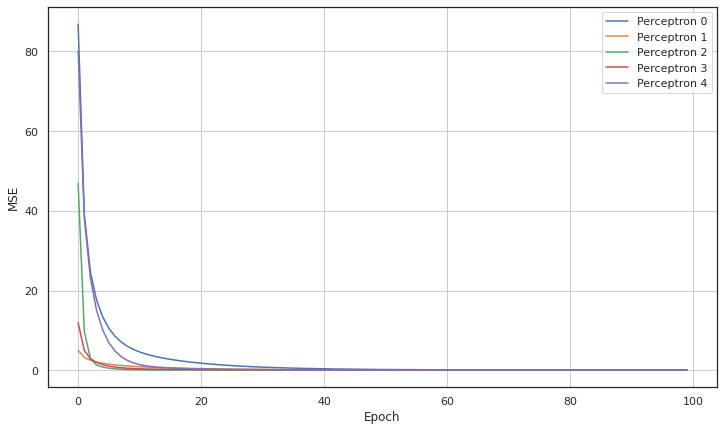

In [15]:
plot_learning_curve(
    errors=[perceptron.error_per_epoch['mse'] for perceptron in perceptrons.values()],
    names=['Perceptron '+str(i) for i in range(len(perceptrons))],
    metric='MSE',
    path=img_path+'learning_curve_mse_online'
)

In [16]:
perceptrons = {
    'perceptron_'+ str(i) : Perceptron(
        learning_rule='delta_batch',
        max_iterations=100,
        scale=5
    ) for i in range(5)
}

In [17]:
for perceptron in perceptrons.values():
    perceptron.fit(X, y_true)

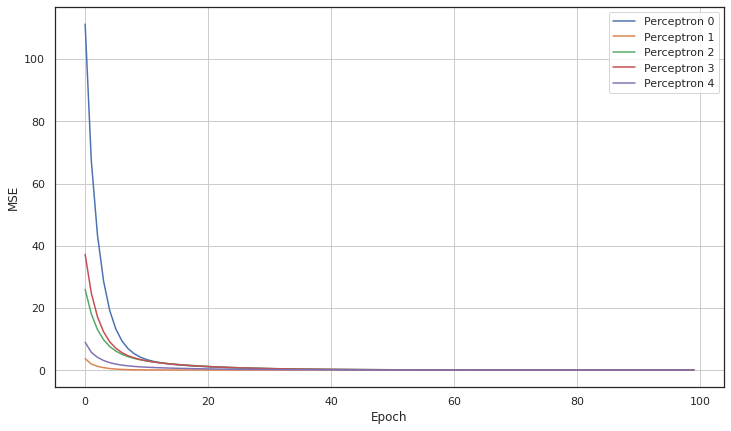

In [18]:
plot_learning_curve(
    errors=[perceptron.error_per_epoch['mse'] for perceptron in perceptrons.values()],
    names=['Perceptron '+str(i) for i in range(len(perceptrons))],
    metric='MSE',
    path=img_path+'learning_curve_mse_batch'
)

### Delta batch without bias

#### Case 1: zero mean

In [19]:
df = generate_binary_classification_data(
    mA=(-1, 1),
    mB=(1, -1),
    classes=(1, -1)
)

X=df[['x1', 'x2']].to_numpy()
y_true=df[['y']].to_numpy()

negative = X[(y_true == -1).flatten()]
positive = X[(y_true == 1).flatten()]

In [20]:
perceptron = Perceptron(learning_rule='delta_batch', max_iterations=200, fit_intercept=False)

In [21]:
perceptron.fit(X, y_true)

In [22]:
perceptron.weights

array([[-0.48235409,  0.41225013]])

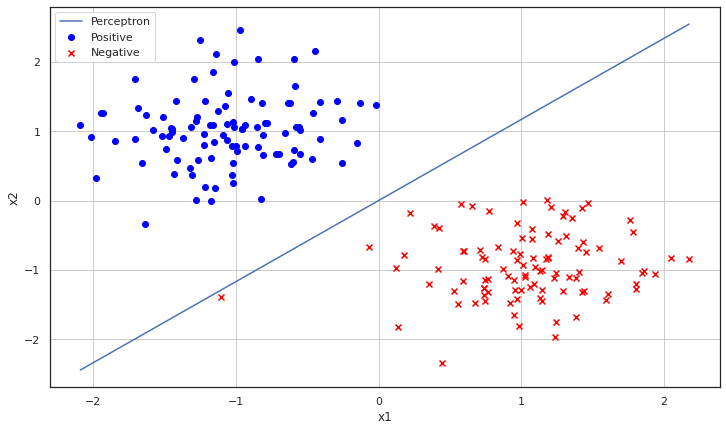

In [23]:
plot_decision_boundary(
    X=X,
    positive=positive,
    negative=negative,
    models=[perceptron],
    names=['Perceptron'],
    path=img_path+'perceptron_delta_batch_zero_mean'
)

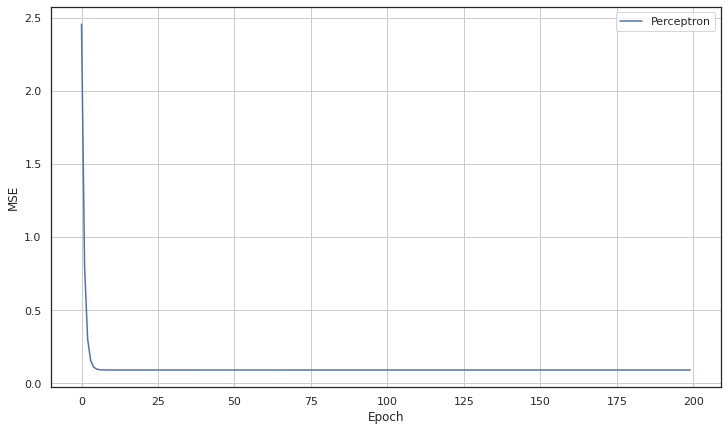

In [24]:
plot_learning_curve(
    errors=[perceptron.error_per_epoch['mse']],
    names=['Perceptron'],
    metric='MSE',
    path=img_path+'zero_mean_mse_batch'
)

#### Case 2: non-zero mean

In [25]:
df = generate_binary_classification_data(
    mA=(3, 3),
    mB=(1, 1),
    classes=(1, -1)
)

X=df[['x1', 'x2']].to_numpy()
y_true=df[['y']].to_numpy()

negative = X[(y_true == -1).flatten()]
positive = X[(y_true == 1).flatten()]

In [26]:
perceptron = Perceptron(learning_rule='delta_batch', max_iterations=200, fit_intercept=False)

In [27]:
perceptron.fit(X, y_true)

In [28]:
perceptron.weights

array([[-301.29739125, -303.60177398]])

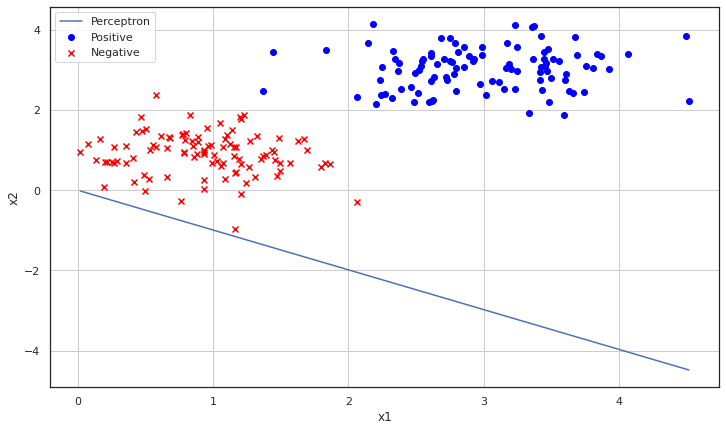

In [29]:
plot_decision_boundary(
    X=X,
    positive=positive,
    negative=negative,
    models=[perceptron],
    names=['Perceptron'],
    path=img_path+'perceptron_delta_batch_non_zero_mean'
)

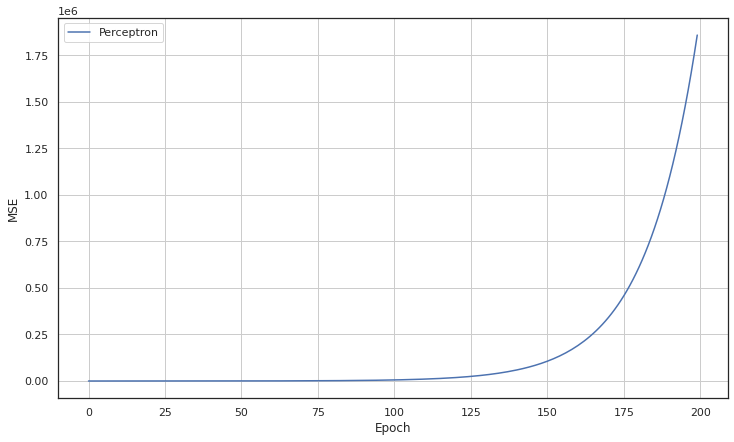

In [30]:
plot_learning_curve(
    errors=[perceptron.error_per_epoch['mse']],
    names=['Perceptron'],
    metric='MSE',
    path=img_path+'non_zero_mean_mse_batch'
)

## 3.1.3 Classification of samples that are not linearly separable

### Simply non-separable data

In [31]:
df = generate_binary_classification_data(
    mA=(1,1),
    sigmaA=1,
    mB=(-1, -1),
    sigmaB=1,
    classes=(1, -1),
)

X=df[['x1', 'x2']].to_numpy()
y_true=df[['y']].to_numpy()

negative = X[(y_true == -1).flatten()]
positive = X[(y_true == 1).flatten()]

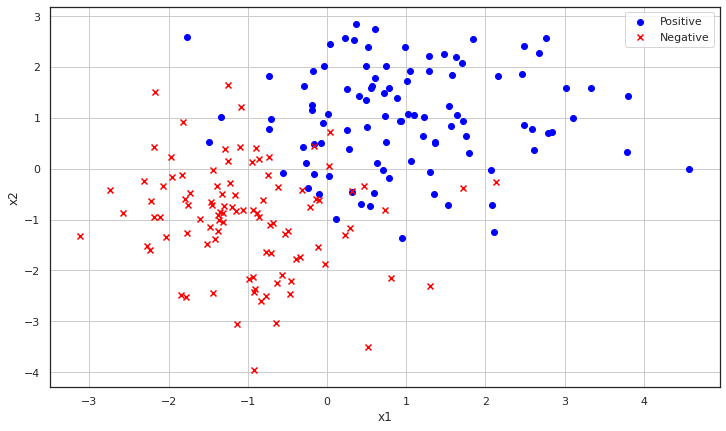

In [32]:
plot_decision_boundary(
    X=X,
    positive=positive,
    negative=negative,
    path=img_path+'non_separable_dataset'
)

In [33]:
perceptron_original = Perceptron(learning_rule='perceptron', max_iterations=200)
perceptron_delta_batch = Perceptron(learning_rule='delta_batch', max_iterations=200)
perceptron_delta_online = Perceptron(learning_rule='delta_online', max_iterations=200)

In [34]:
perceptron_original.fit(X, y_true)
perceptron_delta_batch.fit(X, y_true)
perceptron_delta_online.fit(X, y_true)

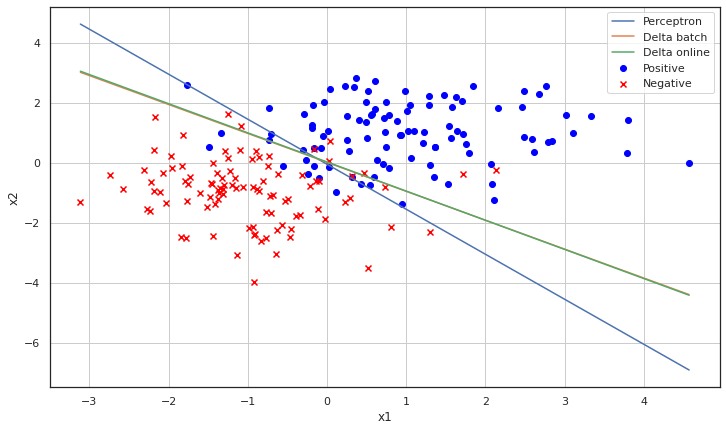

In [35]:
plot_decision_boundary(
    X=X,
    positive=positive,
    negative=negative,
    models=[perceptron_original, perceptron_delta_batch, perceptron_delta_online],
    names=['Perceptron', 'Delta batch', 'Delta online'],
    path=img_path+'perceptron_vs_delta_batch_vs_online_non_separable'
)

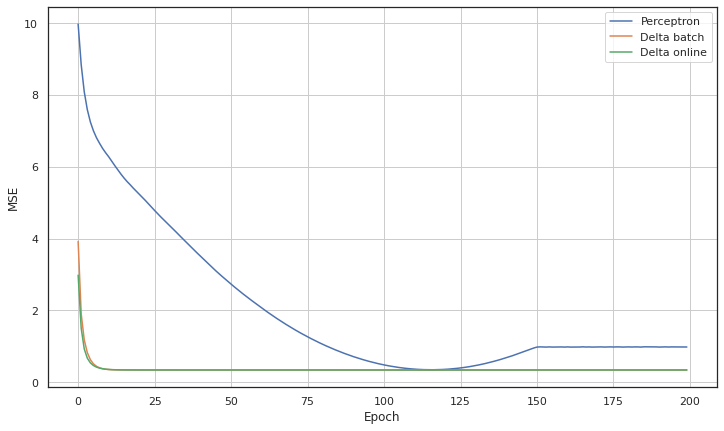

In [36]:
plot_learning_curve(
    errors=[
        perceptron_original.error_per_epoch['mse'], 
        perceptron_delta_batch.error_per_epoch['mse'],
        perceptron_delta_online.error_per_epoch['mse']
    ],
    names=['Perceptron', 'Delta batch', 'Delta online'],
    metric='MSE',
    path=img_path+'perceptron_vs_delta_batch_vs_online_non_separable_mse'
)

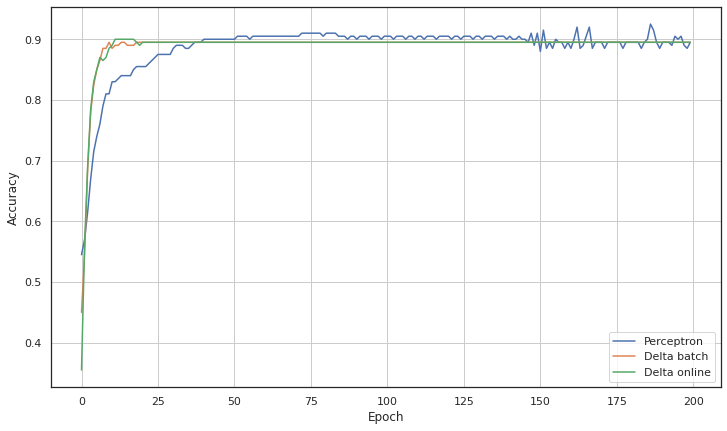

In [37]:
plot_learning_curve(
    errors=[
        perceptron_original.error_per_epoch['accuracy'], 
        perceptron_delta_batch.error_per_epoch['accuracy'],
        perceptron_delta_online.error_per_epoch['accuracy']
    ],
    names=['Perceptron', 'Delta batch', 'Delta online'],
    metric='Accuracy',
    path=img_path+'perceptron_vs_delta_batch_vs_online_non_separable_accuracy'
)

### Non-stationary non-separable data

In [38]:
df = generate_binary_classification_data(
    mA=(1,0.3),
    sigmaA=0.2,
    mB=(0, -0.1),
    sigmaB=0.3,
    classes=(1, -1),
    stationary_distribution = False,
    reset_index = True
)

X=df[['x1', 'x2']].to_numpy()
y_true=df[['y']].to_numpy()

negative = X[(y_true == -1).flatten()]
positive = X[(y_true == 1).flatten()]

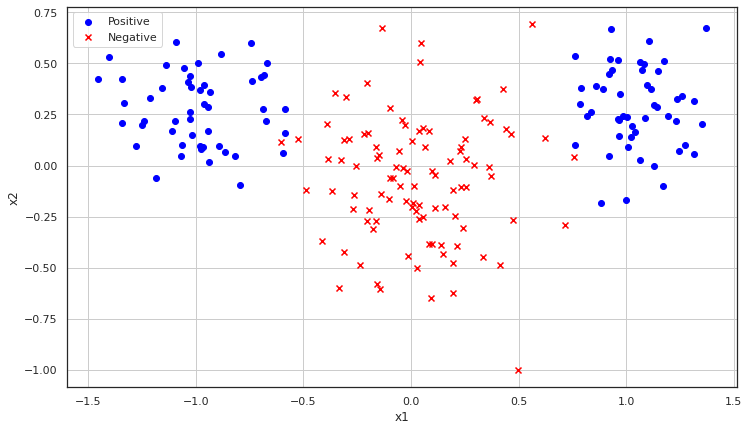

In [39]:
plot_decision_boundary(
    X=X,
    positive=positive,
    negative=negative,
    path=img_path+'non_stationary_dataset'
)

In [40]:
perceptron_original = Perceptron(learning_rule='perceptron', max_iterations=200)
perceptron_delta_batch = Perceptron(learning_rule='delta_batch', max_iterations=200)
perceptron_delta_online = Perceptron(learning_rule='delta_online', max_iterations=200)

In [41]:
perceptron_original.fit(X, y_true)
perceptron_delta_batch.fit(X, y_true)
perceptron_delta_online.fit(X, y_true)

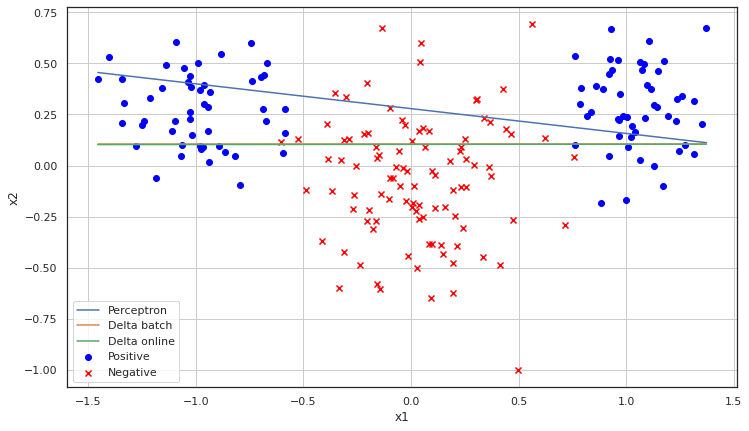

In [42]:
plot_decision_boundary(
    X=X,
    positive=positive,
    negative=negative,
    models=[perceptron_original, perceptron_delta_batch, perceptron_delta_online],
    names=['Perceptron', 'Delta batch', 'Delta online'],
    path=img_path+'perceptron_vs_delta_batch_vs_online_non_separable_non_stationary'
)

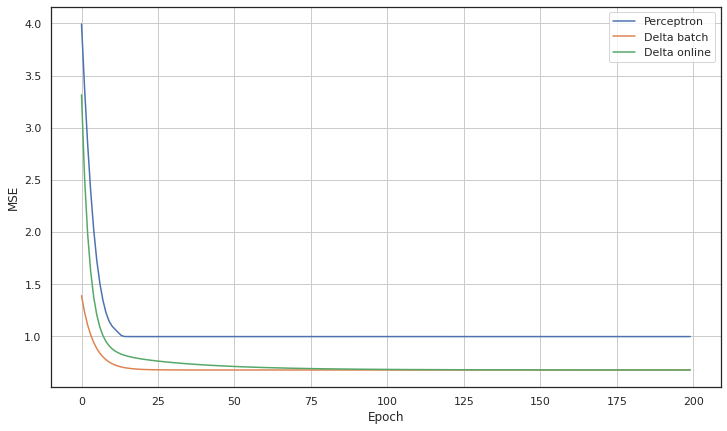

In [43]:
plot_learning_curve(
    errors=[
        perceptron_original.error_per_epoch['mse'], 
        perceptron_delta_batch.error_per_epoch['mse'],
        perceptron_delta_online.error_per_epoch['mse']
    ],
    names=['Perceptron', 'Delta batch', 'Delta online'],
    metric='MSE',
    path=img_path+'perceptron_vs_delta_batch_vs_online_non_separable_non_stationary_mse'
)

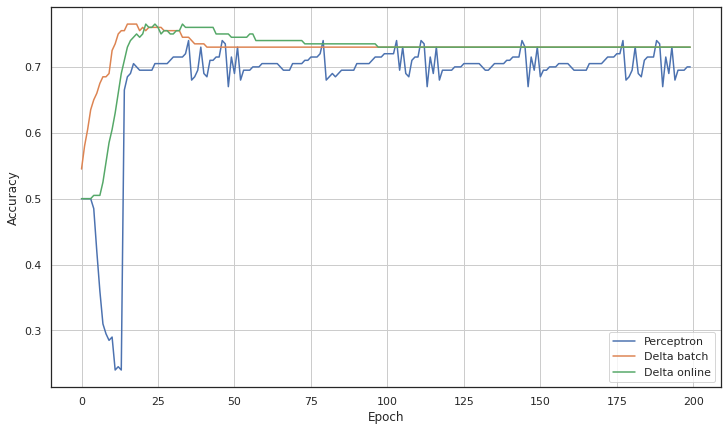

In [44]:
plot_learning_curve(
    errors=[
        perceptron_original.error_per_epoch['accuracy'], 
        perceptron_delta_batch.error_per_epoch['accuracy'],
        perceptron_delta_online.error_per_epoch['accuracy']
    ],
    names=['Perceptron', 'Delta batch', 'Delta online'],
    metric='Accuracy',
    path=img_path+'perceptron_vs_delta_batch_vs_online_non_separable_non_stationary_accuracy'
)

#### Case 1: random 25% from each class

In [45]:
classA = df.index[df['y'] == 1]
classB = df.index[df['y'] == -1]

In [46]:
testA = classA[:int(.25 * len(classA))]
testB = classB[:int(.25*len(classB))]

train_df = df.drop(index=testA)
train_df = train_df.drop(index=testB)

testA_df = df.loc[testA]
testB_df = df.loc[testB]
test_df = pd.concat([testA_df, testB_df])

In [47]:
X_train=train_df[['x1', 'x2']].to_numpy()
y_true_train=train_df[['y']].to_numpy()

negative = X_train[(y_true_train == -1).flatten()]
positive = X_train[(y_true_train == 1).flatten()]

X_test=test_df[['x1', 'x2']].to_numpy()
y_true_test=test_df[['y']].to_numpy()

negative_new = X_test[(y_true_test == -1).flatten()]
positive_new = X_test[(y_true_test == 1).flatten()]

X_A = testA_df[['x1', 'x2']].to_numpy()
y_A = testA_df[['y']].to_numpy()

X_B = testB_df[['x1', 'x2']].to_numpy()
y_B = testB_df[['y']].to_numpy()

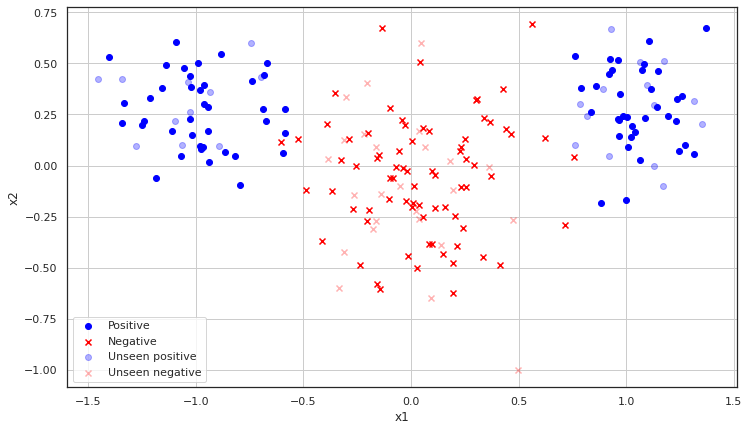

In [48]:
plot_decision_boundary(
    X=X_train,
    positive=positive,
    negative=negative,
    positive_new=positive_new,
    negative_new=negative_new,
    path=img_path+'non_stationary_dataset_25percent_uniform'
)

In [49]:
perceptron_delta_batch = Perceptron(learning_rule='delta_batch', max_iterations=200)

In [50]:
perceptron_delta_batch.fit(X_train, y_true_train)

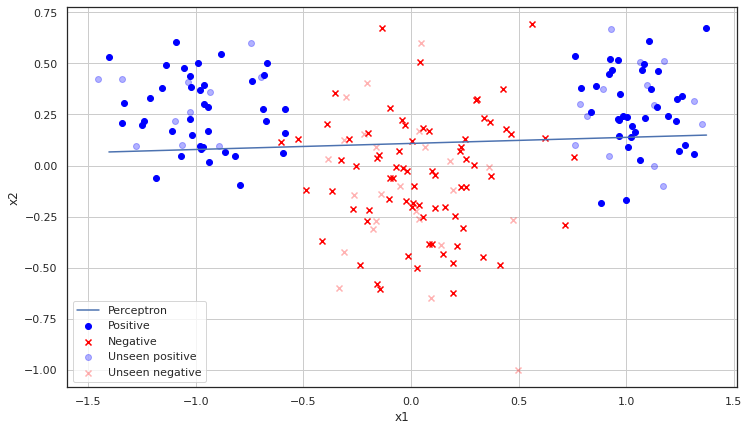

In [51]:
plot_decision_boundary(
    X=X_train,
    positive=positive,
    negative=negative,
    positive_new=positive_new,
    negative_new=negative_new,
    models=[perceptron_delta_batch],
    names=['Perceptron'],
    path=img_path+'perceptron_non_stationary_dataset_25percent_uniform'
)

In [52]:
print(
    'The accuracy on the train set is {}, but on the test set it is {}.'.format(
        perceptron_delta_batch.error_per_epoch['accuracy'][-1],
        accuracy_score(y_true_test.flatten(),perceptron.predict(X_test).flatten())
    )
)

print(
    'The accuracy for class A is {}, while for class B it is {}.'.format(
        accuracy_score(y_A.flatten(),perceptron.predict(X_A).flatten()),
        accuracy_score(y_B.flatten(),perceptron.predict(X_B).flatten())
    )
)

The accuracy on the train set is 0.7466666666666667, but on the test set it is 0.4.
The accuracy for class A is 0.44, while for class B it is 0.36.


In [53]:
print(
    'The MSE on the train set is {}, but on the test set it is {}.'.format(
        perceptron_delta_batch.error_per_epoch['mse'][-1],
        mean_squared_error(y_true_test.flatten(),perceptron.decision_function(X_test).flatten())
    )
)

print(
    'The MSE for class A is {}, while for class B it is {}.'.format(
        mean_squared_error(y_A.flatten(),perceptron.decision_function(X_A).flatten()),
        mean_squared_error(y_B.flatten(),perceptron.decision_function(X_B).flatten())
    )
)

The MSE on the train set is 0.6885875124799483, but on the test set it is 65691.80655888963.
The MSE for class A is 117598.63823410115, while for class B it is 13784.974883678115.


#### Case 2:  random 50% from classA

In [54]:
classA = df.index[df['y'] == 1]

In [55]:
testA = classA[:int(.5 * len(classA))]

train_df = df.drop(index=testA)

testA_df = df.loc[testA]
test_df = testA_df

In [56]:
X_train=train_df[['x1', 'x2']].to_numpy()
y_true_train=train_df[['y']].to_numpy()

negative = X_train[(y_true_train == -1).flatten()]
positive = X_train[(y_true_train == 1).flatten()]

X_test=test_df[['x1', 'x2']].to_numpy()
y_true_test=test_df[['y']].to_numpy()

negative_new = X_test[(y_true_test == -1).flatten()]
positive_new = X_test[(y_true_test == 1).flatten()]

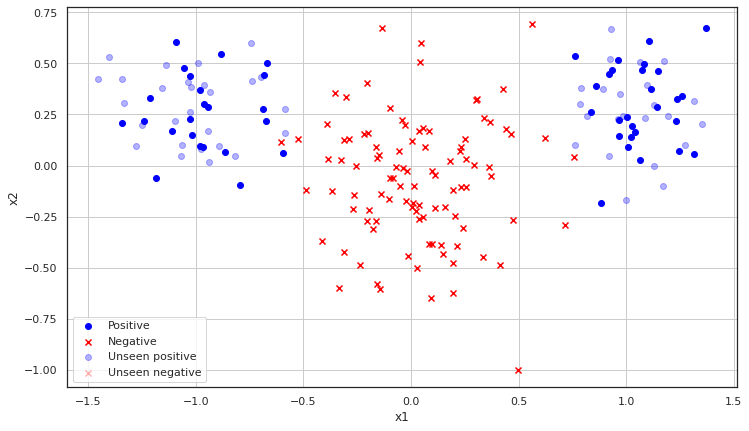

In [57]:
plot_decision_boundary(
    X=X_train,
    positive=positive,
    negative=negative,
    positive_new=positive_new,
    negative_new=negative_new,
    path=img_path+'non_stationary_dataset_50percent_A'
)

In [58]:
perceptron_delta_batch = Perceptron(learning_rule='delta_batch', max_iterations=200)

In [59]:
perceptron_delta_batch.fit(X_train, y_true_train)

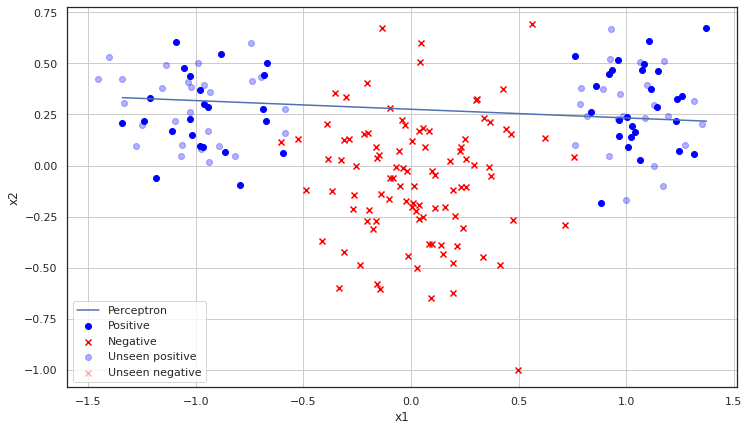

In [60]:
plot_decision_boundary(
    X=X_train,
    positive=positive,
    negative=negative,
    positive_new=positive_new,
    negative_new=negative_new,
    models=[perceptron_delta_batch],
    names=['Perceptron'],
    path=img_path+'perceptron_non_stationary_dataset_50percent_A'
)

In [61]:
print(
    'The accuracy on the train set is {}, but on the test set it is {}.'.format(
        perceptron_delta_batch.error_per_epoch['accuracy'][-1],
        accuracy_score(y_true_test.flatten(),perceptron.predict(X_test).flatten())
    )
)

The accuracy on the train set is 0.7533333333333333, but on the test set it is 0.54.


In [62]:
print(
    'The MSE on the train set is {}, but on the test set it is {}.'.format(
        perceptron_delta_batch.error_per_epoch['mse'][-1],
        mean_squared_error(y_true_test.flatten(),perceptron.decision_function(X_test).flatten())
    )
)

The MSE on the train set is 0.6475847569743896, but on the test set it is 101923.21502685454.


#### Case 3: random 50% from classB

In [63]:
classB = df.index[df['y'] == -1]

In [64]:
testB = classB[:int(.5 * len(classB))]

train_df = df.drop(index=testB)

testB_df = df.loc[testB]
test_df = testB_df

In [65]:
X_train=train_df[['x1', 'x2']].to_numpy()
y_true_train=train_df[['y']].to_numpy()

negative = X_train[(y_true_train == -1).flatten()]
positive = X_train[(y_true_train == 1).flatten()]

X_test=test_df[['x1', 'x2']].to_numpy()
y_true_test=test_df[['y']].to_numpy()

negative_new = X_test[(y_true_test == -1).flatten()]
positive_new = X_test[(y_true_test == 1).flatten()]

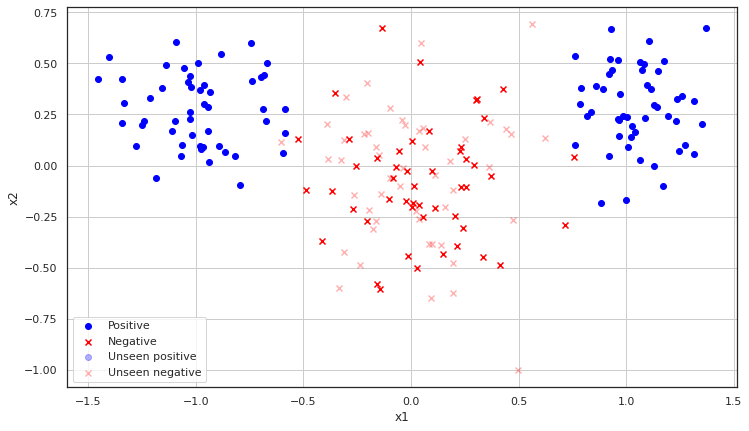

In [66]:
plot_decision_boundary(
    X=X_train,
    positive=positive,
    negative=negative,
    positive_new=positive_new,
    negative_new=negative_new,
    path=img_path+'non_stationary_dataset_50percent_B'
)

In [67]:
perceptron_delta_batch = Perceptron(learning_rule='delta_batch', max_iterations=200)

In [68]:
perceptron_delta_batch.fit(X_train, y_true_train)

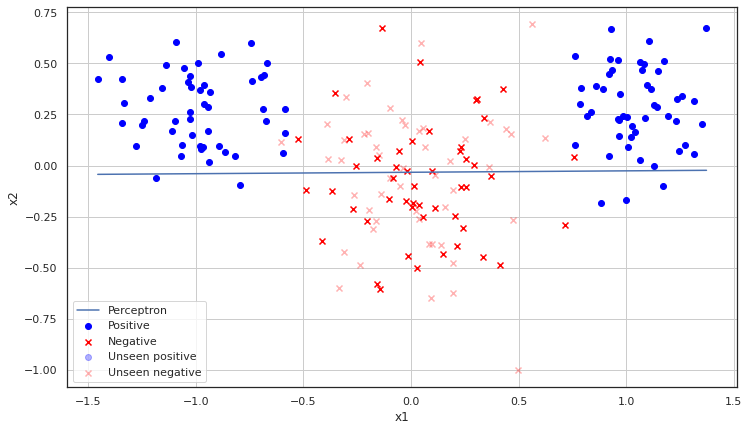

In [69]:
plot_decision_boundary(
    X=X_train,
    positive=positive,
    negative=negative,
    positive_new=positive_new,
    negative_new=negative_new,
    models=[perceptron_delta_batch],
    names=['Perceptron'],
    path=img_path+'perceptron_non_stationary_dataset_50percent_B'
)

In [70]:
print(
    'The accuracy on the train set is {}, but on the test set it is {}.'.format(
        perceptron_delta_batch.error_per_epoch['accuracy'][-1],
        accuracy_score(y_true_test.flatten(),perceptron.predict(X_test).flatten())
    )
)

The accuracy on the train set is 0.82, but on the test set it is 0.4.


In [71]:
print(
    'The MSE on the train set is {}, but on the test set it is {}.'.format(
        perceptron_delta_batch.error_per_epoch['mse'][-1],
        mean_squared_error(y_true_test.flatten(),perceptron.decision_function(X_test).flatten())
    )
)

The MSE on the train set is 0.5677168438000018, but on the test set it is 16180.096843214238.


#### Case 4:  20% from a subset of classA for which classA(1,:)<0 and 80% from a subset of classA for which classA(1,:)>0

In [72]:
classA_1 = df.index[(df['y'] == 1) & (df['x1'] < 0)]
classA_2 = df.index[(df['y'] == 1) & (df['x1'] > 0)]

In [73]:
testA_1 = classA_1[:int(.2 * len(classA_1))]
testA_2 = classA_2[:int(.8*len(classA_2))]

train_df = df.drop(index=testA_1)
train_df = train_df.drop(index=testA_2)

testA_1_df = df.loc[testA_1]
testA_2_df = df.loc[testA_2]
test_df = pd.concat([testA_1_df, testA_2_df])

In [74]:
X_train=train_df[['x1', 'x2']].to_numpy()
y_true_train=train_df[['y']].to_numpy()

negative = X_train[(y_true_train == -1).flatten()]
positive = X_train[(y_true_train == 1).flatten()]

X_test=test_df[['x1', 'x2']].to_numpy()
y_true_test=test_df[['y']].to_numpy()

negative_new = X_test[(y_true_test == -1).flatten()]
positive_new = X_test[(y_true_test == 1).flatten()]

X_A_1 = testA_1_df[['x1', 'x2']].to_numpy()
y_A_1 = testA_1_df[['y']].to_numpy()

X_A_2 = testA_2_df[['x1', 'x2']].to_numpy()
y_A_2 = testA_2_df[['y']].to_numpy()

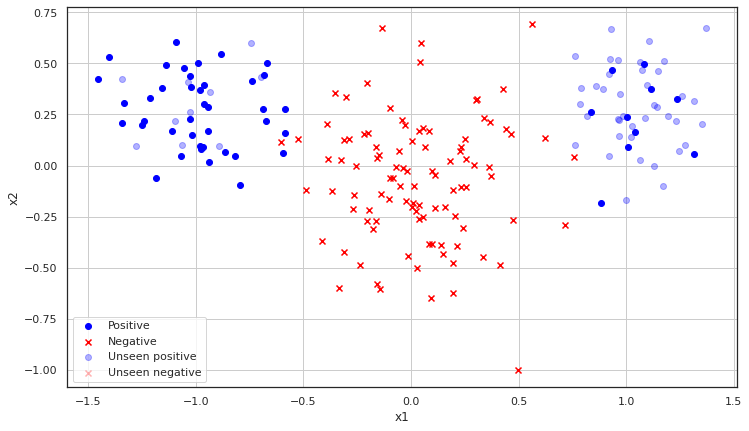

In [75]:
plot_decision_boundary(
    X=X_train,
    positive=positive,
    negative=negative,
    positive_new=positive_new,
    negative_new=negative_new,
    path=img_path+'non_stationary_dataset_non_uniform_A'
)

In [76]:
perceptron_delta_batch = Perceptron(learning_rule='delta_batch', max_iterations=200)

In [77]:
perceptron_delta_batch.fit(X_train, y_true_train)

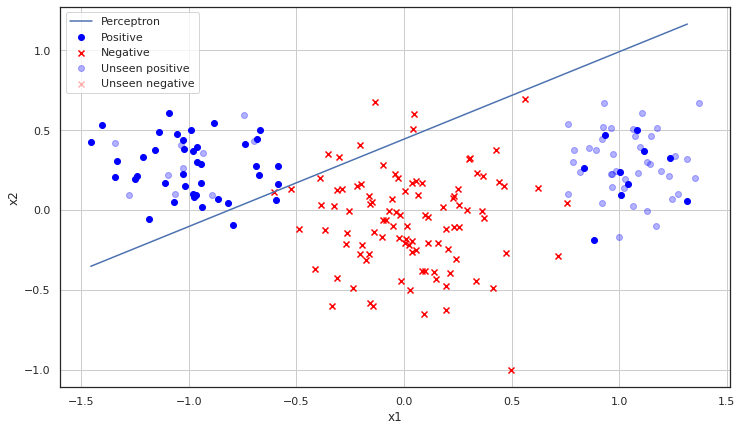

In [78]:
plot_decision_boundary(
    X=X_train,
    positive=positive,
    negative=negative,
    positive_new=positive_new,
    negative_new=negative_new,
    models=[perceptron_delta_batch],
    names=['Perceptron'],
    path=img_path+'perceptron_non_stationary_dataset_non_uniform_A'
)

In [79]:
print(
    'The accuracy on the train set is {}, but on the test set it is {}.'.format(
        perceptron_delta_batch.error_per_epoch['accuracy'][-1],
        accuracy_score(y_true_test.flatten(),perceptron.predict(X_test).flatten())
    )
)

print(
    'The accuracy for class A with x1 < 0 is {}, while for class A with x1 > 1 it is {}.'.format(
        accuracy_score(y_A_1.flatten(),perceptron.predict(X_A_1).flatten()),
        accuracy_score(y_A_2.flatten(),perceptron.predict(X_A_2).flatten())
    )
)

The accuracy on the train set is 0.8733333333333333, but on the test set it is 0.2.
The accuracy for class A with x1 < 0 is 1.0, while for class A with x1 > 1 it is 0.0.


In [80]:
print(
    'The MSE on the train set is {}, but on the test set it is {}.'.format(
        perceptron_delta_batch.error_per_epoch['mse'][-1],
        mean_squared_error(y_true_test.flatten(),perceptron.decision_function(X_test).flatten())
    )
)

print(
    'The MSE for class A with x1 < 0 is {}, while for class A with x1 > 1 it is {}.'.format(
        mean_squared_error(y_A_1.flatten(),perceptron.decision_function(X_A_1).flatten()),
        mean_squared_error(y_A_2.flatten(),perceptron.decision_function(X_A_2).flatten())
    )
)

The MSE on the train set is 0.5579435831167336, but on the test set it is 146788.69462087474.
The MSE for class A with x1 < 0 is 53923.96890536477, while for class A with x1 > 1 it is 170004.87604975223.
